# cvlib 모듈: 얼굴 검출을 구현 쉽게 처리해주는 모듈
- opencv-python는 이미지를 읽고 쓰기에 필요
- detect_face 함수: 얼굴 검출을 위해 미리 잘 훈련된 딥러닝 모델을 제공
- 참조 사이트: https://www.cvlib.net/

> `pip install cvlib`

> `pip install tensorflow-gpu==1.15`

# 얼굴 인식 - 1인

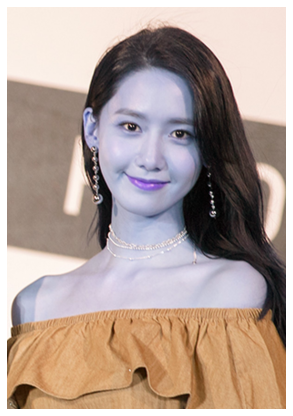

In [5]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
import numpy as np

image_path = 'C:/Users/dojun/Documents/videosamples/image2.jpg'
img = cv2.imread(image_path) # 이미지 읽기
plt.figure(figsize=(5, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

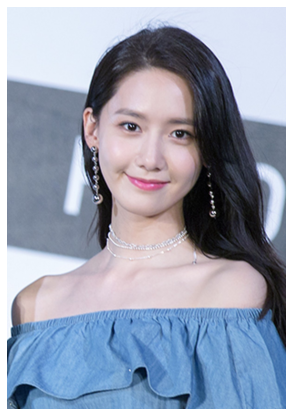

In [10]:
b, g, r = cv2.split(img)
img2 = cv2.merge([r, g, b])

plt.figure(figsize=(5, 10))
plt.imshow(img2)
plt.axis('off')
plt.show()

In [12]:
# detect_faces (얼굴 검출)
faces, confidences = cv.detect_face(img2)
print(faces)
print(confidences)

[[391, 259, 841, 898]]
[0.9998839]


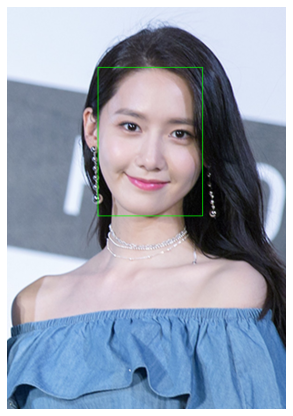

True

In [18]:
# 검출된 얼굴을 박스로 감싸기
for face in faces:
    (startX, startY) = face[0], face[1]  # 시작위치 설정
    (endX, endY) = face[2], face[3]      # 종료위치 설정
    # draw rectangle over face
    cv2.rectangle(img2, (startX, startY), (endX, endY), (0,255,0), 2) # 박스 그리기

plt.figure(figsize=(5, 10))
plt.imshow(img2)
plt.axis('off')
plt.show()
cv2.imwrite('C:/edu/py_data/videos/face_detected3.jpg', img2)

# 얼굴 인식 - 여러명

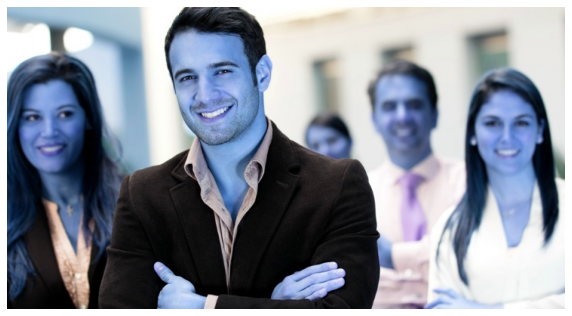

In [22]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
import numpy as np

image_path = 'C:/Users/dojun/Documents/videosamples/image1.jpg'
img = cv2.imread(image_path) # 이미지 읽기
plt.figure(figsize=(10, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

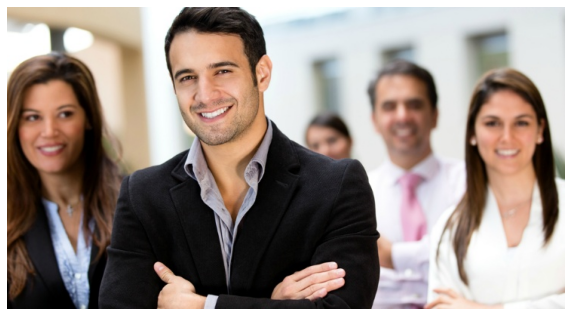

In [25]:
b, g, r = cv2.split(img)
img2 = cv2.merge([r, g, b])

plt.figure(figsize=(10, 15))
plt.imshow(img2)
plt.axis('off')
plt.show()

In [26]:
# detect_faces (얼굴 검출)
faces, confidences = cv.detect_face(img2)
print(faces)
print(confidences)

[[16, 95, 109, 217], [620, 112, 704, 216], [219, 32, 330, 176], [485, 90, 561, 196]]
[0.99995005, 0.9971192, 0.99099594, 0.9655609]


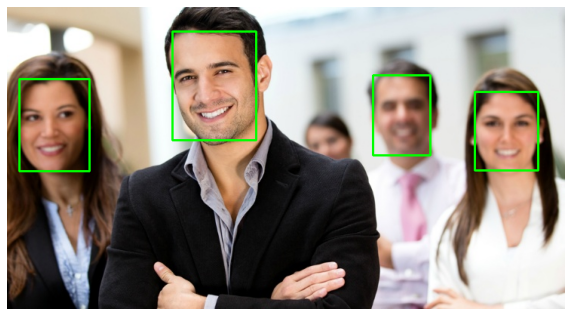

True

In [31]:
# 검출된 얼굴을 박스로 감싸기
for face in faces:
    (startX, startY) = face[0], face[1]  # 시작위치 설정
    (endX, endY) = face[2], face[3]      # 종료위치 설정
    # draw rectangle over face
    cv2.rectangle(img2, (startX, startY), (endX, endY), (0,255,0), 2) # 박스 그리기

plt.figure(figsize=(10, 15))
plt.imshow(img2)
plt.axis('off')
plt.show()
cv2.imwrite('C:/edu/py_data/videos/face_detected3.jpg', img2)

# 성별 인식

In [41]:
image_path = 'C:/Users/dojun/Documents/videosamples/image2.jpg'
img = cv2.imread(image_path) # 이미지 읽기

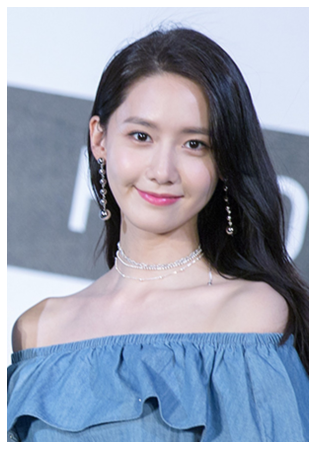

In [42]:
b, g, r = cv2.split(img)
img2 = cv2.merge([r, g, b])

plt.figure(figsize=(10,8))
plt.imshow(img2)
plt.axis('off')
plt.show()

In [43]:
# (얼굴 검출)
faces, confidences = cv.detect_face(img)

for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    # draw rectangle over face
    cv2.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 2) # 검출된 얼굴에 박스 그리기
    face_crop = np.copy(img[startY:endY, startX:endX])
    
    # gender_detection (성별 검출)
    (label, confidence) = cv.detect_gender(face_crop)
    
    print(confidence)
    print(label)
    
    idx = np.argmax(confidence)
    label = label[idx]

    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(img, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                2, (0, 255, 0), 2) # 박스 위에 남자인지 여자인지 라벨과 확률 쓰기

[0.8155376  0.18446249]
['male', 'female']


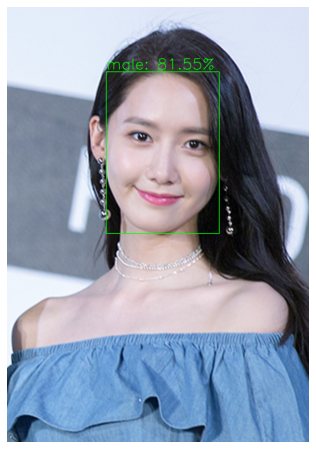

True

In [45]:
plt.figure(figsize=(10,8))
plt.imshow(img2)
plt.axis('off')
plt.show()

cv2.imwrite('C:/edu/py_data/videos/gender_detected1.jpg', img) # 이미지 쓰기

In [135]:
image_path = 'C:/Users/dojun/Documents/videosamples/image1.jpg'
img = cv2.imread(image_path) # 이미지 읽기

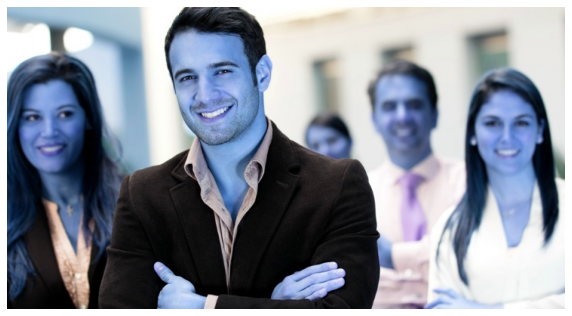

In [136]:
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [137]:
# (얼굴 검출)
faces, confidences = cv.detect_face(img)

for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    # draw rectangle over face
    cv2.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 1) # 검출된 얼굴에 박스 그리기
    face_crop = np.copy(img[startY:endY, startX:endX])
    
    # gender_detection (성별 검출)
    (label, confidence) = cv.detect_gender(face_crop)
    
    print(confidence)
    print(label)
    
    idx = np.argmax(confidence)
    label = label[idx]

    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(img, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (0, 255, 0), 1) # 박스 위에 남자인지 여자인지 라벨과 확률 쓰기

[0.4209925 0.5790075]
['male', 'female']
[0.31652176 0.6834782 ]
['male', 'female']
[0.99876034 0.00123968]
['male', 'female']
[9.9999702e-01 2.9909422e-06]
['male', 'female']


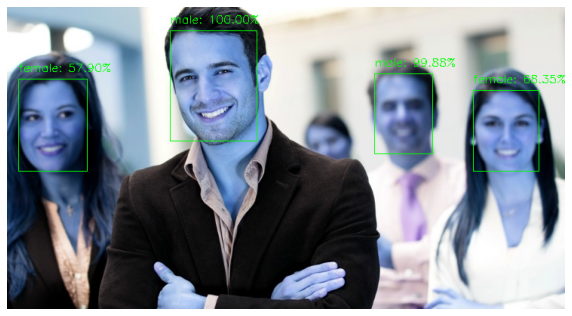

True

In [138]:
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis('off')
plt.show()

cv2.imwrite('C:/edu/py_data/videos/gender_detected2.jpg', img) # 이미지 쓰기

In [140]:
!pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\dojun\anaconda3\envs\python38\lib\site-packages
Requires: termcolor, h5py, typing-extensions, wrapt, opt-einsum, tensorflow-estimator, six, grpcio, protobuf, google-pasta, astunparse, wheel, flatbuffers, tensorboard, absl-py, numpy, gast, keras-preprocessing
Required-by: 


# 사물인식

In [143]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt

In [174]:
image_path = 'C:/Users/dojun/Documents/videosamples/people2.jpg'
img = cv2.imread(image_path) # 이미지 읽기


# detect_common_objects 함수로 (물체 검출)
bbox, label, conf = cv.detect_common_objects(img)

print(bbox, label, conf)

out_img = draw_bbox(img, bbox, label, conf)


cv2.imwrite('./py_data/videos/result3.jpg', img) # 이미지 쓰기

[[2342, 652, 2513, 862], [191, 346, 333, 753], [1282, 583, 1426, 864], [1467, 480, 1634, 864], [9, 637, 167, 867], [67, 232, 203, 620], [2167, 597, 2337, 846], [145, -32, 2430, 898], [956, 246, 1081, 649], [1250, 269, 1366, 630], [1642, 452, 1782, 861], [1973, 581, 2178, 866], [290, 226, 425, 592], [1723, 674, 1923, 864], [1086, 611, 1255, 865], [1066, 254, 1175, 640], [1359, 261, 1492, 639], [1539, 708, 1635, 799], [770, 289, 874, 591], [600, 358, 697, 489], [2268, 196, 2398, 574], [666, 179, 770, 365]] ['person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'handbag', 'person', 'backpack', 'person', 'person'] [0.9379496574401855, 0.9297249913215637, 0.9203691482543945, 0.9054332375526428, 0.880685567855835, 0.8737426400184631, 0.8657039999961853, 0.8656595945358276, 0.8552701473236084, 0.8454766869544983, 0.7923939228057861, 0.7815068364143372, 0.7437034249305725, 0.7335

True

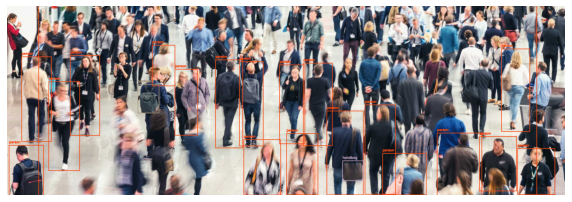

In [175]:
plt.figure(figsize=(10,8))
b, g, r = cv2.split(img)
img=cv2.merge([r, g, b])
plt.imshow(img)
plt.axis('off')
plt.show()

# 사물인식 - 웹캠

In [154]:
# open webcam (웹캠 실행하기)
cam = cv2.VideoCapture(0)

if not cam.isOpened():
    print("Could not open webcam")
    exit()

In [155]:
while cam.isOpened():

    # read, frame 캠에서 속성 가져오기 
    status, frame = cam.read()

    if not status: break

    # cv.detect_common_objects(물체 검출)
    bbox, label, conf = cv.detect_common_objects(frame)

    print(bbox, label, conf)

    # draw_bbox(검출된 물체 가장자리에 바운딩 박스 그리기)
    out = draw_bbox(frame, bbox, label, conf, write_conf=True)

    # 화면 출력
    cv2.imshow("Real-time object detection", out)

    if cv2.waitKey(1) & 0xFF == ord('q'): break
    
# release resources
cam.release()
cv2.destroyAllWindows() 

[] [] []
[] [] []
[] [] []
[] [] []
[] [] []
[] [] []
[[119, 132, 634, 482]] ['person'] [0.8046262264251709]
[[130, 132, 628, 480]] ['person'] [0.9077566266059875]
[[129, 132, 627, 481]] ['person'] [0.8843017816543579]
[[124, 131, 628, 481]] ['person'] [0.897657036781311]
[[118, 128, 634, 482]] ['person'] [0.9089900255203247]
[[126, 93, 625, 482]] ['person'] [0.9531224370002747]
[[120, 90, 648, 480]] ['person'] [0.9783862233161926]
[[115, 87, 648, 480]] ['person'] [0.9496243000030518]
[[176, 92, 642, 483]] ['person'] [0.9374105334281921]
[[120, 85, 645, 480]] ['person'] [0.9586727023124695]
[[77, 87, 651, 479]] ['person'] [0.9721928834915161]
[[-6, 74, 622, 478]] ['person'] [0.9646660685539246]
[[-11, 1, 629, 492]] ['person'] [0.9609670042991638]
[[-5, 49, 631, 484]] ['person'] [0.9728285074234009]
[[6, 50, 636, 485], [210, 213, 283, 296]] ['person', 'book'] [0.956290066242218, 0.5182786583900452]
[[-3, 63, 637, 477]] ['person'] [0.9605811238288879]
[[21, 70, 634, 490]] ['person'] [0.9